In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA ( VISULIZATION )

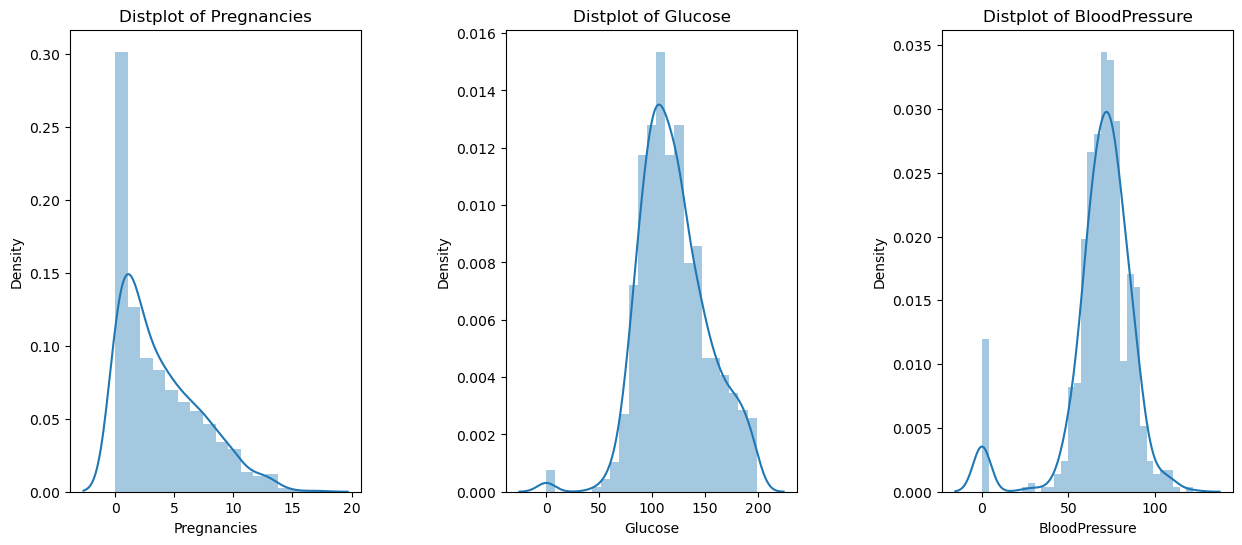

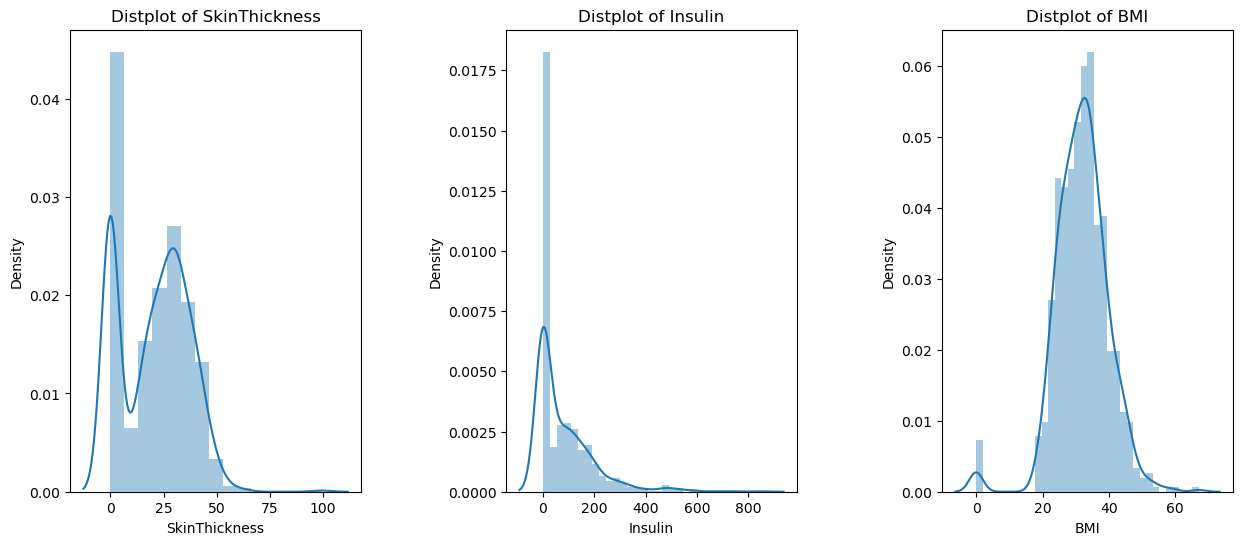

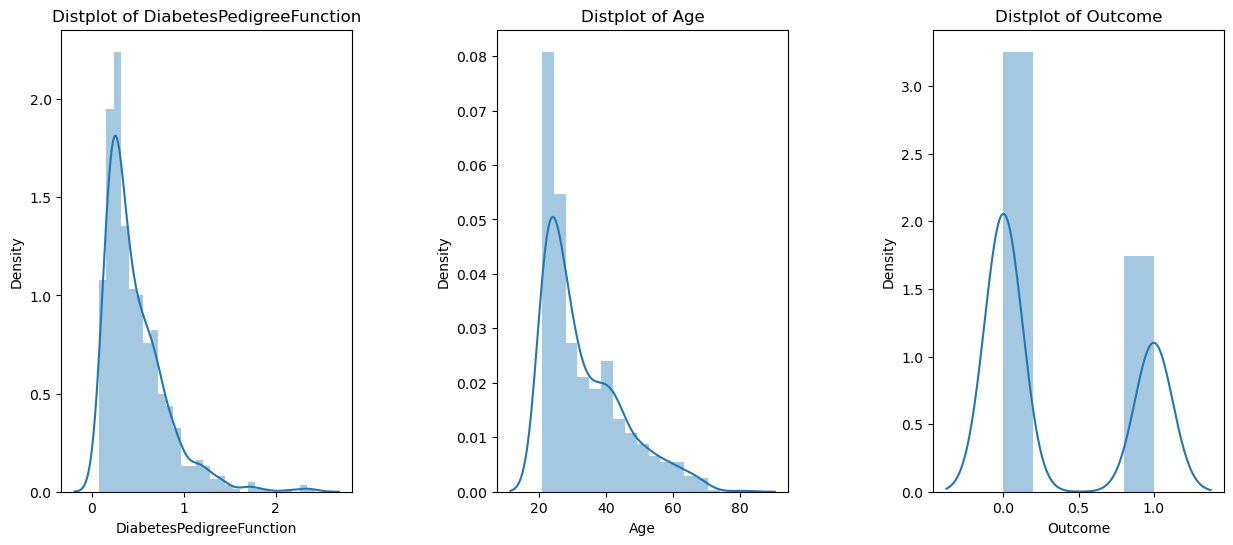

In [6]:
def distplot(cols):
    plt.figure(figsize=(15,6))
    n=0
    for i in cols:
        n +=1
        plt.subplot(1,len(cols),n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        plt.title('Distplot of {0}'.format(i))
        sns.distplot(data[i])
    plt.show()
distplot(['Pregnancies', 'Glucose', 'BloodPressure'])
distplot(['SkinThickness', 'Insulin','BMI'])
distplot(['DiabetesPedigreeFunction', 'Age', 'Outcome'])        

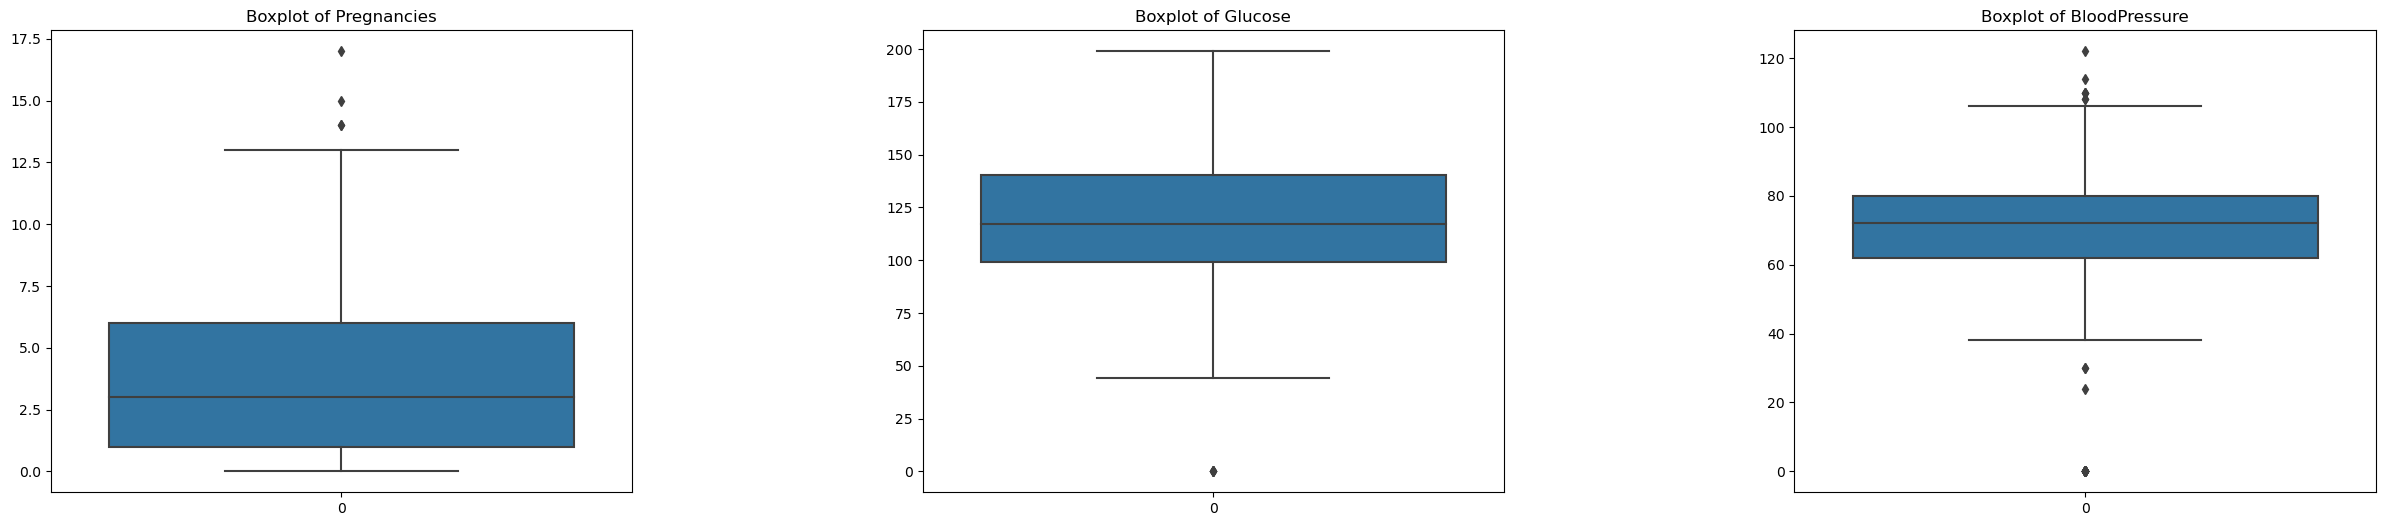

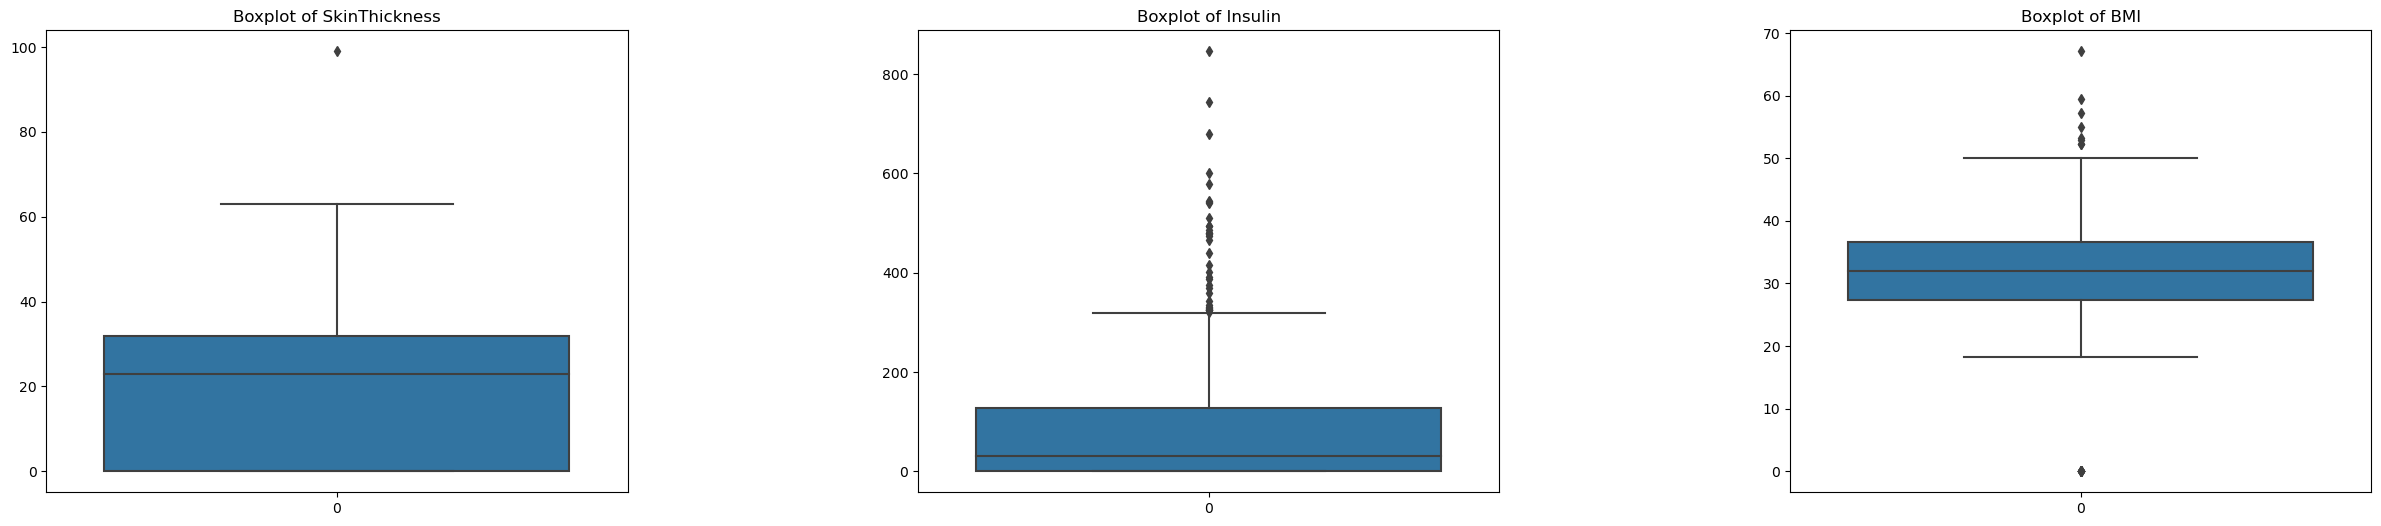

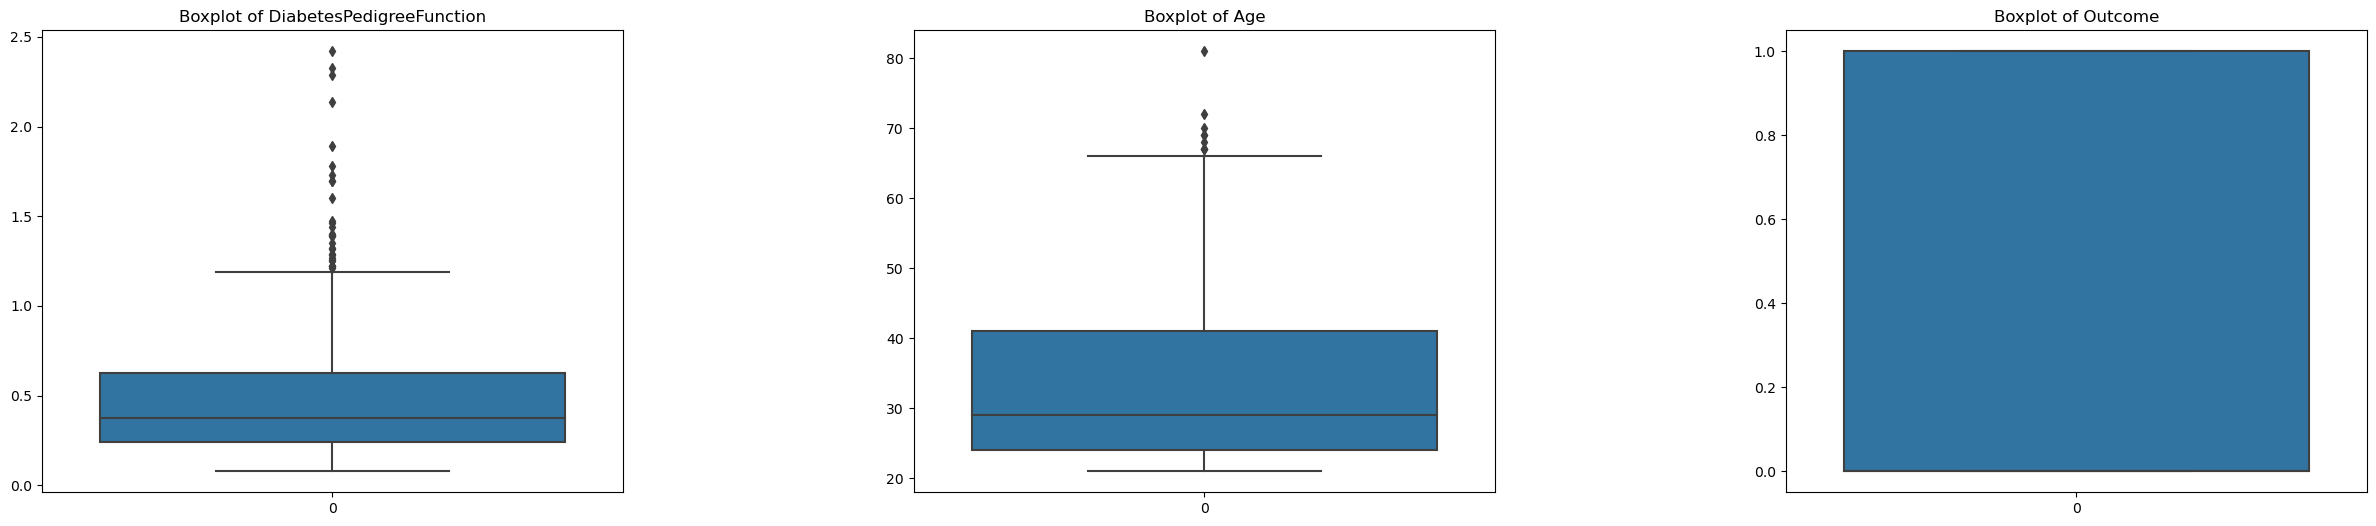

In [7]:
def boxplot(cols):
    plt.figure(1 , figsize = (30,6))
    n = 0
    for i in cols:
        n +=1
        plt.subplot(1,3,n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.title('Boxplot of {0}'.format(i))
        sns.boxplot(data[i])
    plt.show()
    
boxplot(['Pregnancies', 'Glucose', 'BloodPressure'])
boxplot(['SkinThickness', 'Insulin','BMI'])
boxplot(['DiabetesPedigreeFunction', 'Age', 'Outcome'])

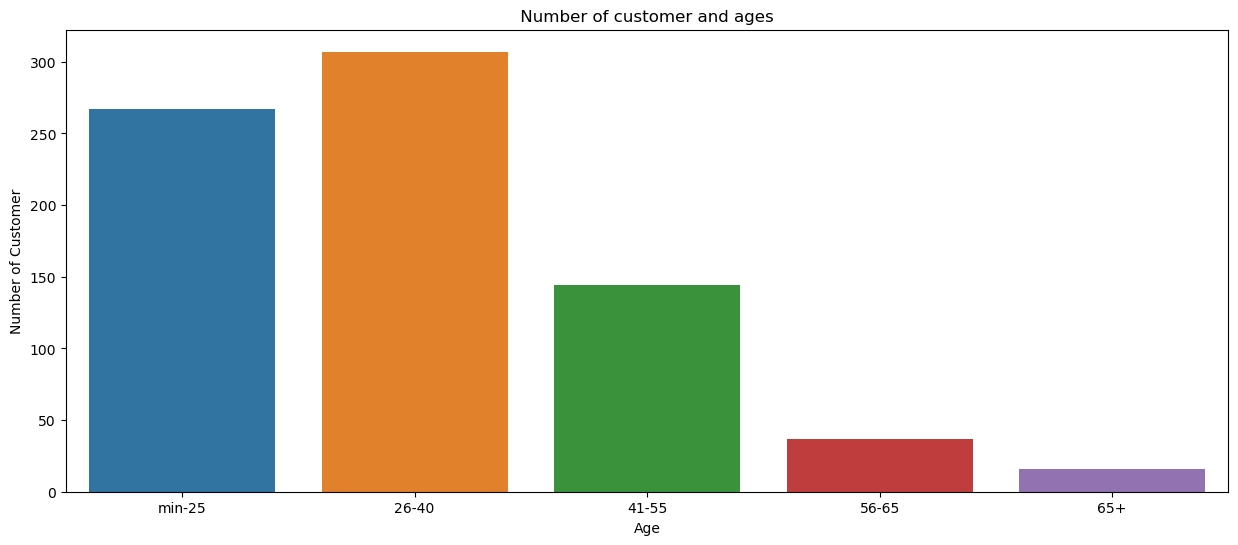

In [8]:
def age_dist():
    min_age = data['Age'].min()
    age_min_25 = data[(data.Age >= min_age) & (data.Age <= 25)]
    age_26_40 = data[(data.Age >= 26) & (data.Age <= 40)]
    age_41_55 = data[(data.Age >= 41) & (data.Age <= 55)]
    age_41_55 = data[(data.Age >= 41) & (data.Age <= 55)]
    age_56_65 = data[(data.Age >= 56) & (data.Age <= 65)]
    age_65above = data[data.Age >= 65]
    
    age_diff = ["min-25","26-40","41-55","56-65","65+"]
    total_Cust = [len(age_min_25),len(age_26_40),len(age_41_55),len(age_56_65),len(age_65above)]

    return age_diff,total_Cust

agex,agey = age_dist()
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey)
plt.title(' Number of customer and ages ')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()


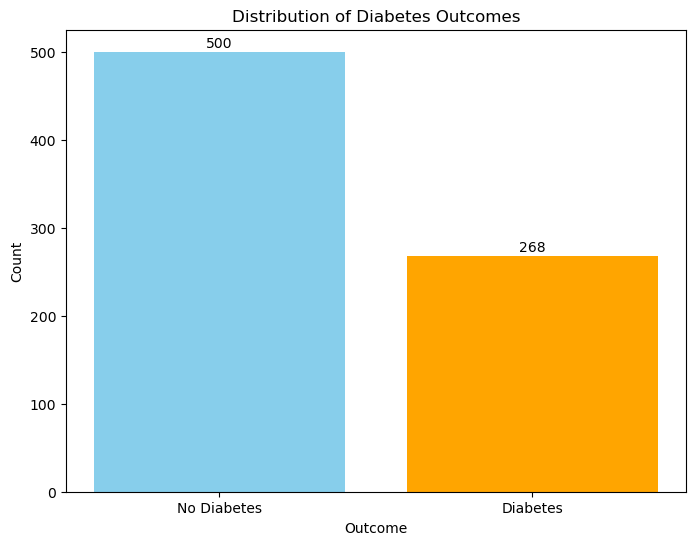

In [9]:
outcome_counts = data['Outcome'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(outcome_counts.index,outcome_counts.values,color=['skyblue','orange'])
plt.title('Distribution of Diabetes Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(outcome_counts.index, ['No Diabetes', 'Diabetes'])

for outcome_counts,count in zip(outcome_counts.index,outcome_counts.values):
    plt.text(outcome_counts,count +5, str(count),ha='center')
plt.show()

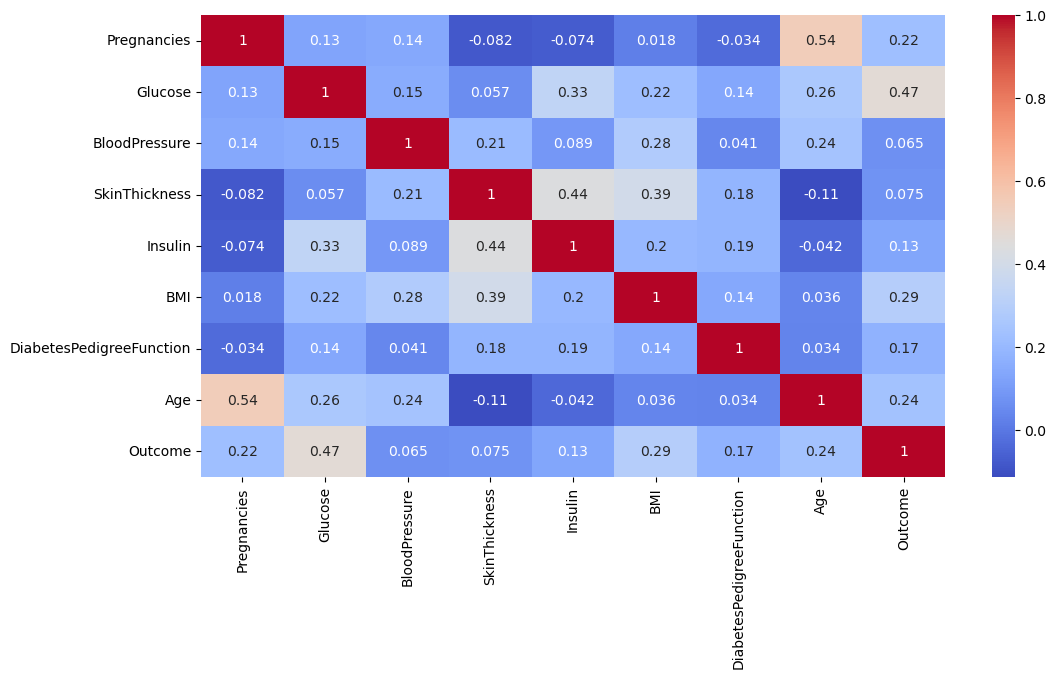

In [10]:
cor = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

# Data Preparing

In [11]:
x = data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Feature Scaling

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
model = LogisticRegression()
model

LogisticRegression()

# Hyperparameter Tuning

In [14]:
parameter = {'penalty':['l1', 'l2', 'elasticnet'],'C':[1,0.01,0.001],'max_iter':[100,300,500]}
logistic_regressor = GridSearchCV(model,param_grid=parameter,scoring='accuracy',cv=5)
logistic_regressor

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 0.01, 0.001], 'max_iter': [100, 300, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

# Model Training

In [15]:
logistic_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 0.01, 0.001], 'max_iter': [100, 300, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [16]:
y_pred = logistic_regressor.predict(x_test) 

# Model Evaluation

In [17]:
accuracy = accuracy_score(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print(f"Accuracy:{accuracy}")
print(f"Classification Report:\n{class_report}")

Accuracy:0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



## Create Confusion Matrix using testing data and prediction data

A binary classification confusion matrix has four components:
True Positive (TP): The number of instances where the model correctly predicts the positive class.

True Negative (TN): The number of instances where the model correctly predicts the negative class.

False Positive (FP): The number of instances where the model incorrectly predicts the positive class (also known as a Type I error).

False Negative (FN): The number of instances where the model incorrectly predicts the negative class (also known as a Type II error).

The formulas for common classification metrics derived from the confusion matrix are: Accuracy:

        Accuracy : (TP+TN) / (TP+FP+FN+TN)
Precision (Positive Predictive Value):

        Precision : TP / (TP+FP)
Recall (Sensitivity, True Positive Rate):

        Recall : TP / (TP+FN)
F1-Score:

        F1-Score : (2 × Precision × Recall) / (Precision + Recall)
        
These metrics provide different perspectives on the model's performance. Accuracy measures the overall correctness, precision focuses on the correctness of positive predictions, recall assesses the ability to capture all positive instances, and the F1-Score balances precision and recall.

Text(95.72222222222221, 0.5, 'Truth')

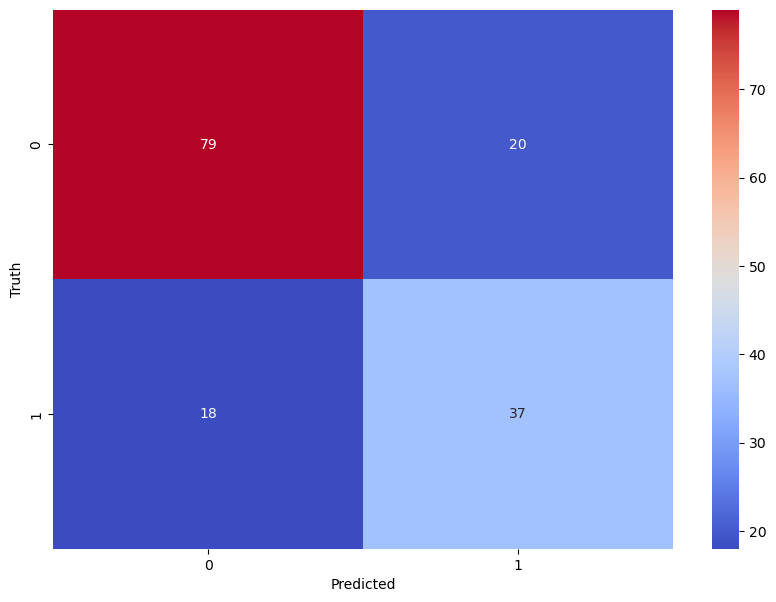

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Saving Model

In [19]:
import joblib

joblib.dump(logistic_regressor, 'diabetes_prediction_model.joblib')

['diabetes_prediction_model.joblib']

# Using Model for New Data

In [20]:
def Prediction(X_new):
    # Load the saved model
    loaded_model = joblib.load('diabetes_prediction_model.joblib')

    # Now, you can use the loaded model to make predictions on new data

    # For example, let's say you have a new data point X_new:
    # X_new should have the same features as your training data (Pregnancies, Glucose, BloodPressure, etc.)

    # Scale the new data using the same scaler used during training
    X_new_scaled = scaler.transform(X_new)

    # Make predictions
    prediction = loaded_model.predict(X_new_scaled)

    print(f"Prediction: {prediction}")
    if prediction == 0:
        print("Prediction[0] means: The patient is not suffering from diabetes")
    elif prediction == 1:
        print("Prediction[1] means: The patient is suffering from diabetes")
        
    # The 'prediction' variable now contains the predicted outcome (0 or 1) for the new data point

# Assuming X_new is a single data point:
# Pregnancies: 6
# Glucose: 148
# BloodPressure: 72
# SkinThickness: 35
# Insulin: 0
# BMI: 33.6
# DiabetesPedigreeFunction: 0.627
# Age: 50    
X_new = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])
Prediction(X_new)



Prediction: [1]
Prediction[1] means: The patient is suffering from diabetes


In [21]:
def Prediction(X_new):
    # Load the saved model
    loaded_model = joblib.load('diabetes_prediction_model.joblib')

    # Now, you can use the loaded model to make predictions on new data

    # For example, let's say you have a new data point X_new:
    # X_new should have the same features as your training data (Pregnancies, Glucose, BloodPressure, etc.)

    # Scale the new data using the same scaler used during training
    X_new_scaled = scaler.transform(X_new)

    # Make predictions
    prediction = loaded_model.predict(X_new_scaled)

    print(f"Prediction: {prediction}")
    if prediction == 0:
        print("Prediction[0] means: The patient is not suffering from diabetes")
    elif prediction == 1:
        print("Prediction[1] means: The patient is suffering from diabetes")
        
    # The 'prediction' variable now contains the predicted outcome (0 or 1) for the new data point


# Assuming X_new1 is a single data point:
# Pregnancies: 1
# Glucose: 1
# BloodPressure: 72
# SkinThickness: 35
# Insulin: 0
# BMI: 33.6
# DiabetesPedigreeFunction: 0.627
# Age: 50
X_new1 = np.array([[1, 85, 89, 66, 0, 26.6, 0.167, 31]])
Prediction(X_new1)

Prediction: [0]
Prediction[0] means: The patient is not suffering from diabetes
